# Enade - PySpark

In [1]:
import findspark
findspark.init()

In [2]:
findspark.find()

'C:\\Spark\\spark-3.0.1-bin-hadoop2.7'

In [4]:
import pyspark
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, lit, regexp_replace

conf = SparkConf().setAppName('enade2019').setMaster('local')
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

In [7]:
df = spark.read\
    .options(delimiter=';', inferSchema=True, header=True)\
    .csv("./enade2019/microdados_enade_2019/2019/3.DADOS/microdados_enade_2019.txt")

In [8]:
df.printSchema()

root
 |-- NU_ANO: integer (nullable = true)
 |-- CO_IES: integer (nullable = true)
 |-- CO_CATEGAD: integer (nullable = true)
 |-- CO_ORGACAD: integer (nullable = true)
 |-- CO_GRUPO: integer (nullable = true)
 |-- CO_CURSO: integer (nullable = true)
 |-- CO_MODALIDADE: integer (nullable = true)
 |-- CO_MUNIC_CURSO: integer (nullable = true)
 |-- CO_UF_CURSO: integer (nullable = true)
 |-- CO_REGIAO_CURSO: integer (nullable = true)
 |-- NU_IDADE: integer (nullable = true)
 |-- TP_SEXO: string (nullable = true)
 |-- ANO_FIM_EM: integer (nullable = true)
 |-- ANO_IN_GRAD: string (nullable = true)
 |-- CO_TURNO_GRADUACAO: string (nullable = true)
 |-- TP_INSCRICAO_ADM: integer (nullable = true)
 |-- TP_INSCRICAO: integer (nullable = true)
 |-- NU_ITEM_OFG: integer (nullable = true)
 |-- NU_ITEM_OFG_Z: integer (nullable = true)
 |-- NU_ITEM_OFG_X: integer (nullable = true)
 |-- NU_ITEM_OFG_N: integer (nullable = true)
 |-- NU_ITEM_OCE: integer (nullable = true)
 |-- NU_ITEM_OCE_Z: integer 

## Selecionando as variáveis de interesse

In [14]:
enade = df.select(
    "CO_IES", "CO_CATEGAD", "CO_GRUPO", "CO_MODALIDADE", "CO_UF_CURSO", "CO_REGIAO_CURSO",
    "NU_IDADE", "TP_SEXO",
    "NT_GER", "NT_FG", "NT_CE",
    "QE_I01", "QE_I02", "QE_I04", "QE_I05", "QE_I08", "QE_I10",
    "QE_I11", "QE_I14", "QE_I15", "QE_I23", "QE_I25", "QE_I26"
)

In [15]:
enade.show()

+------+----------+--------+-------------+-----------+---------------+--------+-------+------+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+
|CO_IES|CO_CATEGAD|CO_GRUPO|CO_MODALIDADE|CO_UF_CURSO|CO_REGIAO_CURSO|NU_IDADE|TP_SEXO|NT_GER|NT_FG|NT_CE|QE_I01|QE_I02|QE_I04|QE_I05|QE_I08|QE_I10|QE_I11|QE_I14|QE_I15|QE_I23|QE_I25|QE_I26|
+------+----------+--------+-------------+-----------+---------------+--------+-------+------+-----+-----+------+------+------+------+------+------+------+------+------+------+------+------+
|     1|     10002|    5710|            1|         51|              5|      27|      M|  51,9| 36,5|   57|     E|     C|     D|     E|     B|     A|     A|     A|     A|     D|     E|     C|
|     1|     10002|    5710|            1|         51|              5|      26|      M|  54,2| 44,3| 57,5|     A|     A|     E|     D|     E|     A|     A|     A|     A|     D|     E|     C|
|     1|     10002|    5710|            1|   

In [34]:
medidade = enade.select(mean("NU_IDADE")).collect()[0][0]
medidade

27.621867582328946

In [35]:
enade\
    .select("NU_IDADE", 'NT_GER')\
    .withColumn("idadecent", col("NU_IDADE") - medidade)\
    .withColumn("idadeaoquadrado", col("idadecent") ** 2)\
    .show()

+--------+------+-------------------+------------------+
|NU_IDADE|NT_GER|          idadecent|   idadeaoquadrado|
+--------+------+-------------------+------------------+
|      27|  51,9|-0.6218675823289459|0.3867192899516483|
|      26|  54,2| -1.621867582328946|  2.63045445460954|
|      23|    NA| -4.621867582328946|21.361659948583217|
|      24|  42,1| -3.621867582328946|13.117924783925323|
|      41|    NA| 13.378132417671054|178.97442698474117|
|      26|  49,3| -1.621867582328946|  2.63045445460954|
|      24|  49,6| -3.621867582328946|13.117924783925323|
|      28|  43,6| 0.3781324176710541|0.1429841252937565|
|      23|  55,3| -4.621867582328946|21.361659948583217|
|      24|  61,6| -3.621867582328946|13.117924783925323|
|      22|  55,1| -5.621867582328946| 31.60539511324111|
|      28|  49,5| 0.3781324176710541|0.1429841252937565|
|      24|  76,8| -3.621867582328946|13.117924783925323|
|      21|  70,2| -6.621867582328946|   43.849130277899|
|      25|  44,1| -2.6218675823

In [36]:
idades = enade\
    .select("NU_IDADE")\
    .withColumn("idadecent", col("NU_IDADE") - medidade)\
    .withColumn("idadeaoquadrado", col("idadecent") ** 2)\
    .select("idadecent", "idadeaoquadrado")\
    .collect()

In [50]:
import numpy as np

In [51]:
idadecent = np.array([idades[i][0] for i in range(len(idades))])
idadeaoquadrado = np.array([idades[i][1] for i in range(len(idades))])

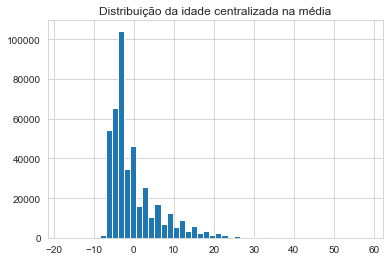

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

plt.hist(idadecent, bins=50)
plt.title("Distribuição da idade centralizada na média")
plt.show()

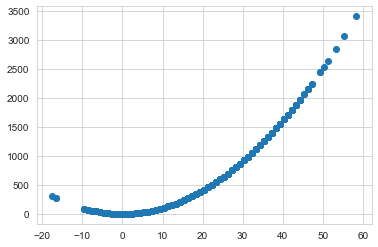

In [56]:
plt.scatter(idadecent, idadeaoquadrado)
plt.show()

## Algumas perguntas para responder?

1. Qual é a nota geral média dos alunos da região nordeste?

2. Qual é a nota geral média dos alunos pretos do estado da Bahia?

3. Qual é a média da nota no componente específico dos alunos do Rio grande do Sul no curso de Engenharia Elétrica?

4. Qual é a média de nota do componente de formação geral de alunas do sexo feminino, pardas, de Minas gerais em cursos presenciais de Engenharia de Produção?

In [61]:
enade\
    .filter(enade.CO_REGIAO_CURSO == 2)\
    .select(mean("NT_GER")).show()

+-----------------+
|      avg(NT_GER)|
+-----------------+
|43.53680473372781|
+-----------------+



In [62]:
enade\
    .filter( (enade.QE_I02 == 'B') & (enade.CO_UF_CURSO == 29)  )\
    .select(mean("NT_GER").alias('MED_NT_GER')).show()

+-----------------+
|       MED_NT_GER|
+-----------------+
|40.88992974238876|
+-----------------+



In [95]:
a = np.array(
    enade
    .filter( (enade.CO_GRUPO == 5806) & (enade.CO_UF_CURSO == 43)  )
    .withColumn('nt_ce_f', regexp_replace('NT_CE', ',', '.'))
    .withColumn('nt_ce_f', col("nt_ce_f").cast('float'))
    .filter(col("nt_ce_f").isNotNull())
    .select('nt_ce_f').collect()
)

In [96]:
a.mean()

34.79692636314013

In [101]:
sc.stop()